# SVM Practice: Predict an Iris Species
For this project I will use Support Vector Machines and sklearn to predict based on a set of values whether the species of an iris flower is versicolor, setosa, or virginica

First we are going to import the data and make sure we can see it, as well as load our dependencies. Which will be numpy for calculations, sklearn for the SVM, and pandas to get our csv dataset

In [22]:
import numpy as np
from sklearn import preprocessing, cross_validation, svm
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv')
# we do not need the id column it does not do anything 
df.drop(['Id'], 1, inplace=True)
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Here we can make sure that we have the data and plot the Sepal Length data (in the blue) and the Sepal Width plotted in red

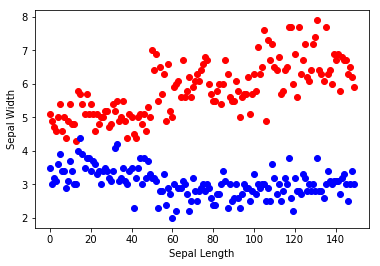

In [63]:
plt.plot(df['SepalLengthCm'], 'ro', df['SepalWidthCm'], 'bo')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Now that we have the data we can start to train our model

In [37]:
X = np.array(df.drop(['Species'], 1))
y = np.array(df['Species'])

# we will set the testing size too 20% of the dataset
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

# fit the model
clf = svm.SVC(kernel='rbf', decision_function_shape='ovo')
clf.fit(X_train, y_train)

# get the accuracy
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.966666666667


Now that we trained the model and we got the accuracy from the testing data we can start to find what type of Iris a flower is with our own specific data 

In [43]:
predict = np.array([2.2, 4.4, 1.3, 0.2])
prediction = clf.predict(predict)
print(prediction)

['Iris-virginica']


C:\Users\Ryam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


And just like that we were able to predict what type of an Iris flower a flower is given a specific set of inputs and an SVM, of course now we can play around with the parameters and see what type of kernels work best, for example, we can try using a linear kernel:

In [82]:
linearkernel = svm.SVC(kernel='linear', decision_function_shape='ovr')
linearkernel.fit(X_train, y_train)

linearaccuracy = clf.score(X_test, y_test)
print(linearaccuracy)

0.966666666667


Now we can see the results on the same data we had above:

In [44]:
print(linearkernel.predict(predict))

['Iris-setosa']


C:\Users\Ryam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


As you can see, with the kernel set to linear and the decision function shape set to ovr we got different results and our prediction says our flower is an Iris setosa. Now we can try an polynomial kernel:

In [83]:
polykernel = svm.SVC(kernel='linear', decision_function_shape='ovr')
polykernel.fit(X_train, y_train)

polyaccuracy = clf.score(X_test, y_test)
print(polyaccuracy)

0.966666666667


In [85]:
print(polykernel.predict(predict))

['Iris-setosa']


C:\Users\Ryam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


As you can see again with the polynomial kernel we got Iris Setosa we can continue to play around with the kernels as well as the parameters to get an optimal classifier